<a href="https://colab.research.google.com/github/ashutosh-619/The-Sparks-Foundation-Internship/blob/main/Task_5_EDA_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task: Perform EDA on the IPL dataset. Identify the factors that contribute to a team's good performance. Suggest teams or players a company should endorse for its products.**

Author: Ashutosh Pandey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
deliveries = pd.read_csv('deliveries.csv')
print("Shape: ", deliveries.shape)
deliveries.head()

Shape:  (179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
matches = pd.read_csv('matches.csv')
print("Shape: ", matches.shape)
matches.head()

Shape:  (756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Let's first explore the 'matches' dataframe.
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


**Key Takeaways: The win_by_runs column indicates that tha maximum margin of winning for the team batting first was by 146 runs.
Also, the win_by_wickets column indicates that the biggest victory for the team which went second was by 10 wickets.**

In [6]:
#Let's check for the missing values.
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
#The final column, i.e. 'umpire3' has a lot of missing values, thus it would be better to drop it as it doesnt provide us any significant information.
matches = matches.drop('umpire3', axis=1)

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [9]:
#The following function is needed to add data to the plots made later on.
def annotation_plot(ax,w,h):                             #function to add data to plot
    ax.spines['top'].set_visible(False)                  #used to make the top boundary of a plot area invisible
    ax.spines['right'].set_visible(False)                #used to make the right boundary of a plot area ivisible
    for p in ax.patches:                                 #iterates through the patches, and adds data over them.
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

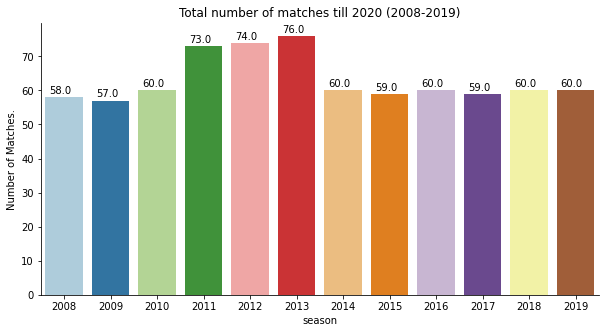

In [10]:
#Let us first plot the number of matches in each IPL season.
plt.figure(figsize=(10,5))                                            #defining a plot area
ax = sns.countplot(x="season", data = matches, palette='Paired')        #We'll be making use of a countplot
plt.title('Total number of matches till 2020 (2008-2019)')            #setting the title
plt.ylabel('Number of Matches.')                                      #the y-label
annotation_plot(ax,0.08,1)                                            #calling our function with width and height equal to 0.08 and 1
plt.show()

In [11]:
#Notice the values on top of each of the bars, that is what our function has been doing.
#Takeaways: 2013 had the most number of matches but since then, the number of matches has been in 59 or 60.
#This corresponds to the fact that there was a concern raised during those years regarding players playing too many matches might lead to degradation of performances in other, more significant tournaments.

**The most obvious and most important evidence of a team being sucessful is the number of times it has won.
So, next up, we plot the total number of matches won by each of the teams.**

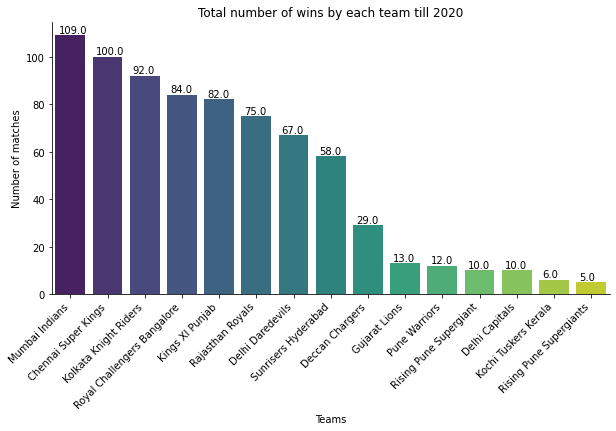

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="winner", data = matches, order = matches['winner'].value_counts().index,palette='viridis')
plt.title("Total number of wins by each team till 2020")
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Teams')
plt.ylabel('Number of matches')
annotation_plot(ax,0.08,1)
plt.show()

**Key Takeaways: Mumbai Indians has won the most number of matches, a staggering 109, with Chennai Super Kings taking the second spot, with a total of 92 matches.**

In [13]:
#Winning matches continually will eventually lead to winning the tournament.
#Let us now plot the total number of times the teams have won the IPL tournament.

In [14]:
#We are trying to find the number of times teams have won the whole tournament.
#One way of doing so is to group by the season and then find the last match of the season and find its winner.
#That's what we are doing here.
each_season_winner = matches.groupby('season')['season','winner'].tail(1)

In [15]:
print(each_season_winner)

     season                 winner
58     2017         Mumbai Indians
116    2008       Rajasthan Royals
173    2009        Deccan Chargers
233    2010    Chennai Super Kings
306    2011    Chennai Super Kings
380    2012  Kolkata Knight Riders
456    2013         Mumbai Indians
516    2014  Kolkata Knight Riders
575    2015         Mumbai Indians
635    2016    Sunrisers Hyderabad
695    2018    Chennai Super Kings
755    2019         Mumbai Indians


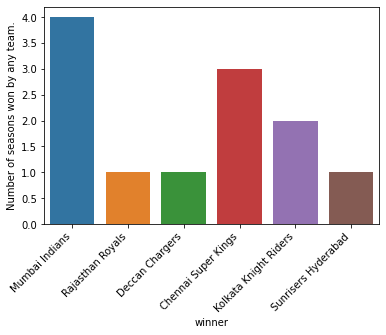

In [16]:
sns.countplot(x='winner', data = each_season_winner)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of seasons won by any team.')
plt.show()

**Key Takeaways: Mumbai Indians has won the tournament 4 times!**

In [17]:
#Next up, we plot the venues that have hosted IPl matches all these years.
#To obtain the counts, we use .value_counts() and then turn it into a dictionary for easier access.
venue_dict = dict(matches['venue'].value_counts())
venue_df = pd.DataFrame(columns=['Venue', 'Num_Matches'])   #A dataframe which will contain the counts

In [18]:
for key, value in venue_dict.items():                           #Iterating over the dictionary
    df = pd.DataFrame({'Venue':[key], 'Num_Matches':[value]})   #Venue stores the name, Num_Matches stores the count
    venue_df = venue_df.append(df, ignore_index=True)           #Append our temporary df to the main df

In [19]:
venue_df.head()

,Venue,Num_Matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


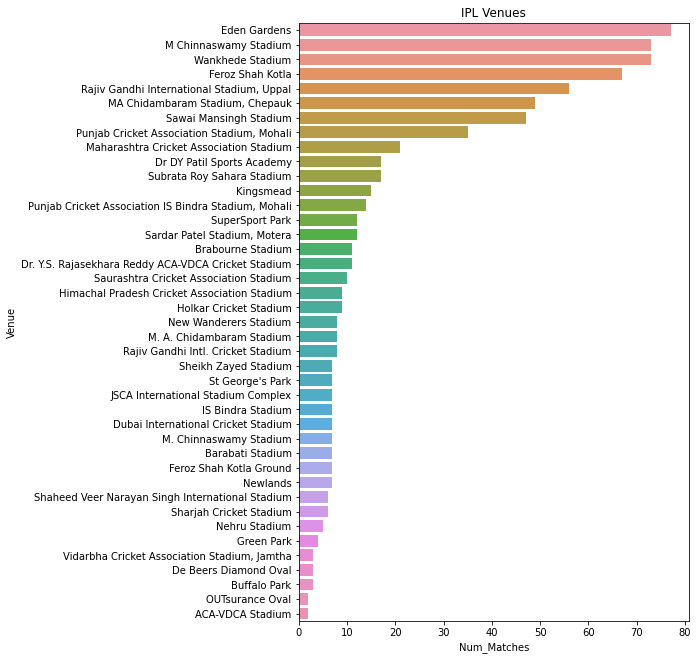

In [20]:
#This time we'll use barplot to visualize the data.
plt.figure(figsize=(7,11))
plt.title("IPL Venues")
sns.barplot(x='Num_Matches', y='Venue', data=venue_df)

**Key Takeaways: Eden Gardens has hosted the most number of matches followed by Wankhede Stadium and M Chinnaswamy Stadium.**

**A team is what its players are. For a team to be strong, its players have to be the best.
So now, let's list out the top 10 players who have received the prestigious Man of the Match award the most number of times.**

In [21]:
#Following the same approach as before, we first obtain the value counts and then turn it into a dictionary.
motm_dict = dict(matches['player_of_match'].value_counts()[:10])            #Slicing so as to get the top 10
motm_df = pd.DataFrame(columns=['Player_Name', 'MotM_Count'])
for key, value in motm_dict.items():
    df = pd.DataFrame({'Player_Name':[key], 'MotM_Count':[value]})
    motm_df = motm_df.append(df, ignore_index=True)

In [22]:
motm_df

,Player_Name,MotM_Count
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


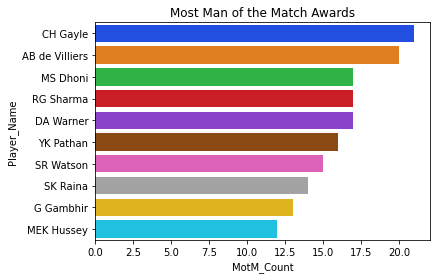

In [23]:
plt.title("Most Man of the Match Awards")
sns.barplot(x='MotM_Count', y='Player_Name', data=motm_df, palette='bright')

**Key Takeaways: Chris Gayle has won Man of the Match for an astounding 21 times followed by AB de Villiers who has won it 20 times.**

In [24]:
#Winning the toss is also important considering the fact that the team gets to decide what they wanna do first.
#But, does it really affect the outcome? Let's find out :)
toss_dict = dict(matches['toss_winner'].value_counts())
toss_df = pd.DataFrame(columns=['Team_Name', 'Toss_Wins'])
for key, value in toss_dict.items():
    df = pd.DataFrame({'Team_Name':[key], 'Toss_Wins':[value]})
    toss_df = toss_df.append(df, ignore_index=True)

In [25]:
toss_df.head()

,Team_Name,Toss_Wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81


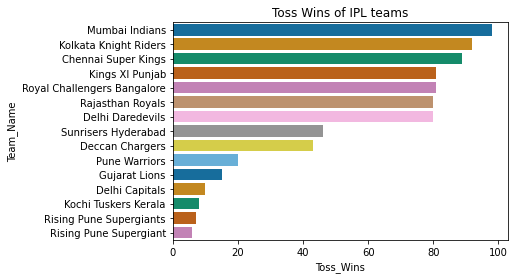

In [26]:
#And Mumbai Indians is at the top again! With 98 wins of the toss, they are at the top of the leaderboard.
#We can visualize the df using a barplot.
plt.title("Toss Wins of IPL teams")
sns.barplot(x='Toss_Wins', y='Team_Name', data=toss_df, palette='colorblind');

In [27]:
#Let us calculate the proabability of winning the match if a team has already won the toss.
win_count = 0
for index, val in matches.iterrows():            #the iterrows() function is used for iterating over the rows of the df.
    if(val['toss_winner'] == val['winner']):     #simple logic, if the toss winner is same as match winner, then increment the count.
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count / (matches.shape[0])                      #dividing by the total number of matches
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


**As it can be seen, the probability of winning the match after winning the toss is just 52%**

**Key Takeaways: Winning the toss doesn't really guarantee a match win.**

In [28]:
#Now let us take a look at the 'deliveries' dataset.
#We'll first use it to plot the top 10 batsmen in IPL, i.e. batsmen with the most runs.

In [29]:
#Logic: Group by the batsman name, and then sum up his runs.
total_runs = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
total_runs_sorted = total_runs.sort_values(by='Runs',ascending=False)   #Sort the total runs, so as to obtain the top batsmen
top_batsmen = total_runs_sorted[:10]                                    #get the top 10 batsmen

In [30]:
top_batsmen

,batsman,Runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


Text(0.5, 1.0, 'Top 10 Batsmen in IPL')

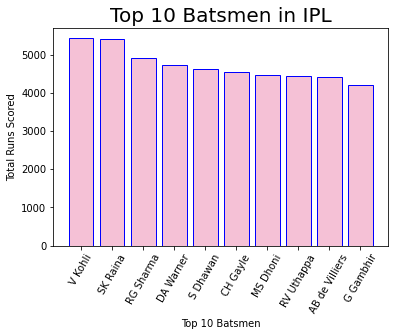

In [31]:
#Using matplotlib's bar plot to visualize the above dataframe
plt.bar(top_batsmen['batsman'], top_batsmen['Runs'], color=(0.9,0.4,0.6,0.4), edgecolor='blue')
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen', size=10)
plt.ylabel('Total Runs Scored', size=10)
plt.title('Top 10 Batsmen in IPL',size=20)

**Key Takeaways: Virat Kohli is the top scorer with 5,434 runs!! Suresh Raina is at a close second with 5,415 runs!**

In [32]:
#Good bowling in a cricket match is as important as good batting.
#So let us plot the top 10 bowlers over the years.
bowling_wickets = deliveries[deliveries['dismissal_kind']!='run out']    #filtering out the dismissals so that run-outs aren't counted.
bowling_tot = bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wicket_type')
bowling_wick_count = bowling_tot.groupby('bowler').count().reset_index()
bowling_wick_count.head()

,bowler,level_1,Wicket_type
0,A Ashish Reddy,18,18
1,A Chandila,11,11
2,A Choudhary,5,5
3,A Flintoff,2,2
4,A Joseph,6,6


In [33]:
bowling_top=bowling_wick_count.sort_values(by='Wicket_type',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wicket_type']][0:10] 
top_bowlers.reset_index(drop=True)

,bowler,Wicket_type
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


Text(0.5, 1.0, 'Top 10 Bowlers in IPL')

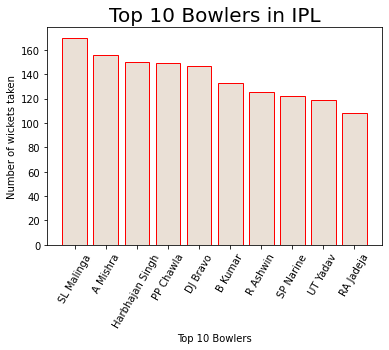

In [35]:
#Using a bar plot to visualize the above dataframe
plt.bar(top_bowlers['bowler'], top_bowlers['Wicket_type'], color=(0.6,0.4,0.2,0.2), edgecolor='red')
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers', size=10)
plt.ylabel('Number of wickets taken', size=10)
plt.title('Top 10 Bowlers in IPL',size=20)

**Key Takeaways: SL Malinga has the highest number of wickets i.e. 170 and is the leading wicket-taker in IPL over all these years. Next on the leaderboard is A Mishra with 156 wickets.**

**Final Thoughts:**

**1. Mumbai Indians has been the most successful team in IPL over the years having won 4 tournaments and 109 matches.**

**2. Virat Kohli (Royal Challengers Bangalore) has been the highest scorer of runs, totalling at 5,434 runs till the last season.**

**3. SL Malinga (Mumbai Indians) has been the highest wicket-taker, having a total of 170 wickets.**

**4. Chris Gayle (Royal Challengers Bangalore) has won the Man of the Match for a total of 21 times, making him one of the best performers of IPL**

**5. Winning the toss does not affect the outcome of the match significantly.**

**6. Eden Garden has hosted the most number of matches**